In [16]:
import numpy as np
import importlib
from icet import ClusterExpansion
import multiprocessing

In [17]:
import disall

In [3]:
%load_ext autoreload
%autoreload 2
importlib.reload(disall)

<module 'disall' (<_frozen_importlib_external._NamespaceLoader object at 0x14736ee975b0>)>

In [4]:
from disall.ce_parsing import best_integer_composition, make_supercell_cubic

In [5]:
from disall.ce_opt import get_args_opt, opt_mc

In [6]:
ce = ClusterExpansion.read('ce_four.pkl')
cs = ce.get_cluster_space_copy()
elements = cs.chemical_symbols
prim = cs.primitive_structure

In [8]:
int_comp, size, mnk, comp_diff = best_integer_composition([0.25, 0.25, 0.25, 0.25], min_l=5, conventional= True, prim = prim)
mnk

[5, 5, 5]

In [9]:
super_structure = make_supercell_cubic(prim, mnk, conventional=True)

In [10]:
args = get_args_opt(elements, int_comp, 'MC_00')

In [11]:
args_opt  =  {'no_steps': int(1e5),
    'midpoint': int(0.5e5),
    'interval': 50,
    'ce_supercell': super_structure,
    'ce_file':'ce_four.pkl',
              }

In [12]:
args_opt.update(args)

In [13]:
args_opt

{'no_steps': 100000,
 'midpoint': 50000,
 'interval': 50,
 'ce_supercell': Atoms(symbols='Al500', pbc=True, cell=[18.131249999999998, 18.131249999999998, 18.131249999999998]),
 'ce_file': 'ce_four.pkl',
 'concentration': {'Al': 125, 'Co': 125, 'Cr': 125, 'Cu': 125},
 'string_concentration': 'Al0125Co0125Cr0125Cu0125',
 'SRO_keys': [('Al', 'Al'),
  ('Al', 'Co'),
  ('Al', 'Cr'),
  ('Al', 'Cu'),
  ('Co', 'Co'),
  ('Co', 'Cr'),
  ('Co', 'Cu'),
  ('Cr', 'Cr'),
  ('Cr', 'Cu'),
  ('Cu', 'Cu')],
 'directory_logs': 'MC_00/Al0125Co0125Cr0125Cu0125/'}

In [14]:
# opt_mc(args_opt)

In [18]:
np.random.seed(22)
arr = np.random.random((2,4))
comps = arr / arr.sum(axis=1)[:, np.newaxis]
comps

array([[0.10582496, 0.24452533, 0.21348608, 0.43616363],
       [0.11630986, 0.23026912, 0.18383589, 0.46958514]])

In [21]:
directory = 'MC_01'
parallel_args = []

for i in range(2):
    int_comp, size, mnk, comp_diff = best_integer_composition(comps[i], min_l=6, conventional= True, prim = prim)
    super_structure = make_supercell_cubic(prim, mnk, conventional=True)
    args = get_args_opt(elements, int_comp, directory)
    args_opt  =  {'no_steps': int(1e5),
    'midpoint': int(0.5e5),
    'interval': 50,
    'ce_supercell': super_structure.copy(),
    'ce_file':'ce_four.pkl',
              }
    args_opt.update(args)
    parallel_args.append(args_opt)
parallel_args

[{'no_steps': 100000,
  'midpoint': 50000,
  'interval': 50,
  'ce_supercell': Atoms(symbols='Al2304', pbc=True, cell=[29.009999999999998, 29.009999999999998, 32.63625]),
  'ce_file': 'ce_four.pkl',
  'concentration': {'Al': 244, 'Co': 563, 'Cr': 492, 'Cu': 1005},
  'string_concentration': 'Al0244Co0563Cr0492Cu1005',
  'SRO_keys': [('Al', 'Al'),
   ('Al', 'Co'),
   ('Al', 'Cr'),
   ('Al', 'Cu'),
   ('Co', 'Co'),
   ('Co', 'Cr'),
   ('Co', 'Cu'),
   ('Cr', 'Cr'),
   ('Cr', 'Cu'),
   ('Cu', 'Cu')],
  'directory_logs': 'MC_01/Al0244Co0563Cr0492Cu1005/'},
 {'no_steps': 100000,
  'midpoint': 50000,
  'interval': 50,
  'ce_supercell': Atoms(symbols='Al1512', pbc=True, cell=[21.7575, 25.38375, 32.63625]),
  'ce_file': 'ce_four.pkl',
  'concentration': {'Al': 176, 'Co': 348, 'Cr': 278, 'Cu': 710},
  'string_concentration': 'Al0176Co0348Cr0278Cu0710',
  'SRO_keys': [('Al', 'Al'),
   ('Al', 'Co'),
   ('Al', 'Cr'),
   ('Al', 'Cu'),
   ('Co', 'Co'),
   ('Co', 'Cr'),
   ('Co', 'Cu'),
   ('Cr', 'Cr'

2025-02-01 10:01:36 - starting opt_mc for Al0176Co0348Cr0278Cu0710
2025-02-01 10:01:36 - starting opt_mc for Al0244Co0563Cr0492Cu1005


2025-02-01 10:07:04 - subsystem Al0176Co0348Cr0278Cu0710 at [600]K took a time of 327.6817328929901s with an objective value of 1.81431047652549

2025-02-01 10:08:22 - subsystem Al0244Co0563Cr0492Cu1005 at [600]K took a time of 405.522335767746s with an objective value of 1.7429775721547571

2025-02-01 10:12:27 - subsystem Al0176Co0348Cr0278Cu0710 at [1200]K took a time of 323.5387349128723s with an objective value of 1.7576856095551872

2025-02-01 10:15:27 - subsystem Al0244Co0563Cr0492Cu1005 at [1200]K took a time of 425.19565057754517s with an objective value of 1.2971884622823282

2025-02-01 10:18:29 - subsystem Al0176Co0348Cr0278Cu0710 at [1800]K took a time of 361.55767464637756s with an objective value of 0.63860170713434

2025-02-01 10:22:30 - subsystem Al0244Co0563Cr0492Cu1005 at [1800]K took a time of 423.0713918209076s with an objective valu

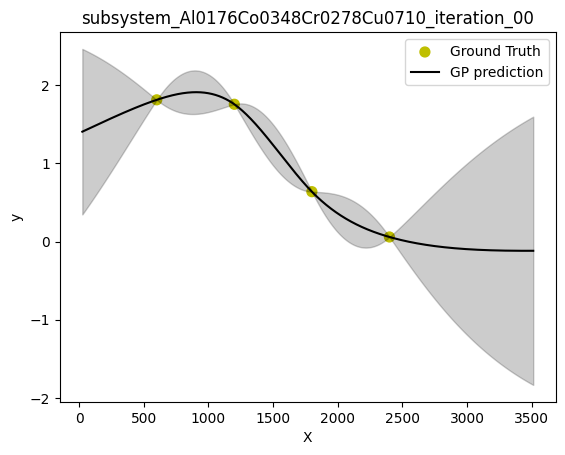

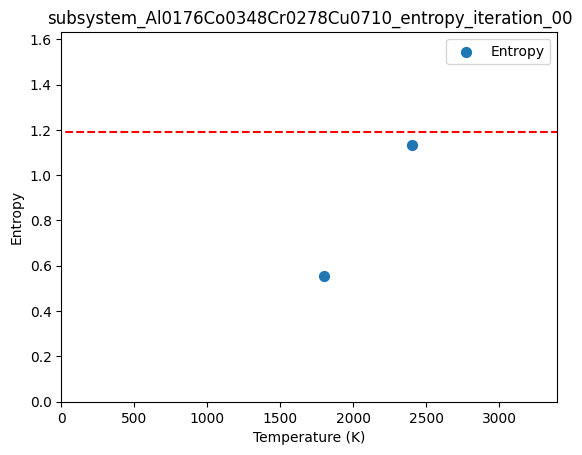

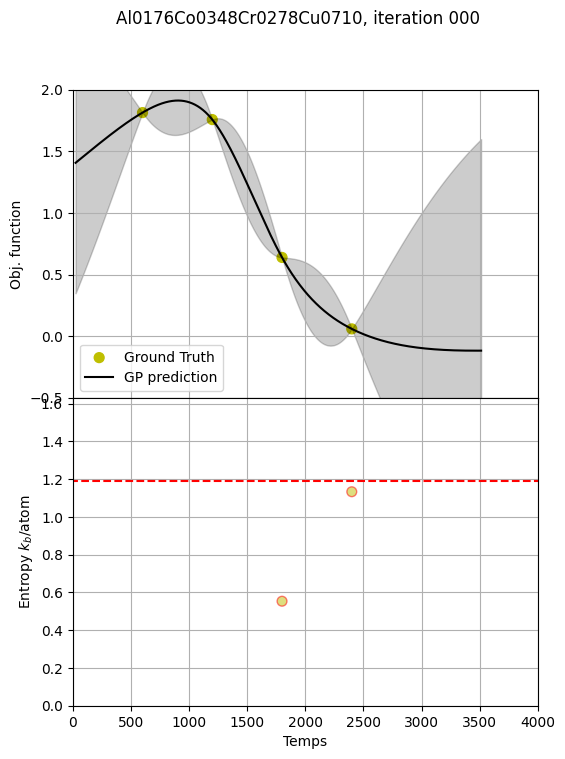

2025-02-01 10:24:42 - subsystem Al0176Co0348Cr0278Cu0710, real values: 
 X = [[ 600]
 [1200]
 [1800]
 [2400]] 
 y = [[1.81431048]
 [1.75768561]
 [0.63860171]
 [0.05875649]], scaled values:
 X = [[-1.34164079]
 [-0.4472136 ]
 [ 0.4472136 ]
 [ 1.34164079]]


2025-02-01 10:24:43 - GP train and selection start: 

2025-02-01 10:24:43 - subsystem Al0176Co0348Cr0278Cu0710, iteration 1, x selected = [3.] , in non-scaled x = [[3512.46117975]]

2025-02-01 10:30:18 - subsystem Al0244Co0563Cr0492Cu1005 at [2400]K took a time of 467.89171719551086s with an objective value of 0.07040106588195627



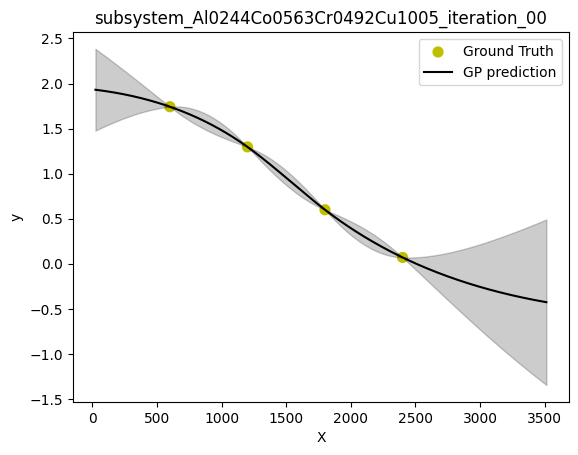

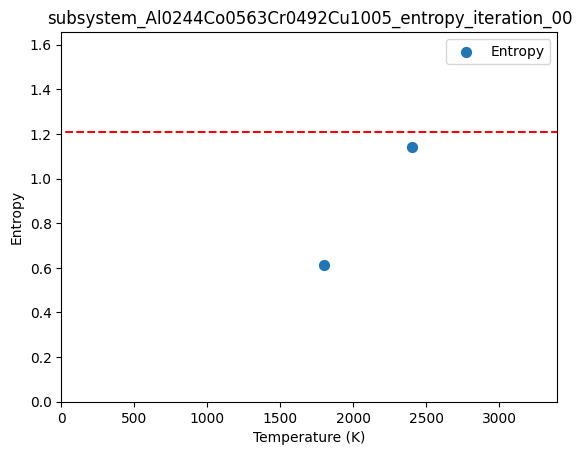

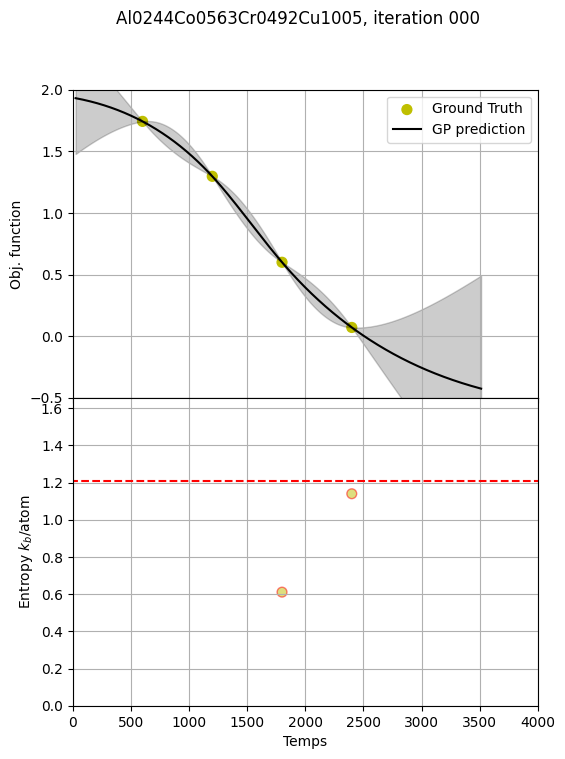

2025-02-01 10:30:19 - subsystem Al0244Co0563Cr0492Cu1005, real values: 
 X = [[ 600]
 [1200]
 [1800]
 [2400]] 
 y = [[1.74297757]
 [1.29718846]
 [0.59939335]
 [0.07040107]], scaled values:
 X = [[-1.34164079]
 [-0.4472136 ]
 [ 0.4472136 ]
 [ 1.34164079]]


2025-02-01 10:30:20 - GP train and selection start: 

2025-02-01 10:30:20 - subsystem Al0244Co0563Cr0492Cu1005, iteration 1, x selected = [3.] , in non-scaled x = [[3512.46117975]]

2025-02-01 10:31:16 - subsystem Al0176Co0348Cr0278Cu0710, iteration 1, in non-scaled y obtained = 0.6728507863170918 , 



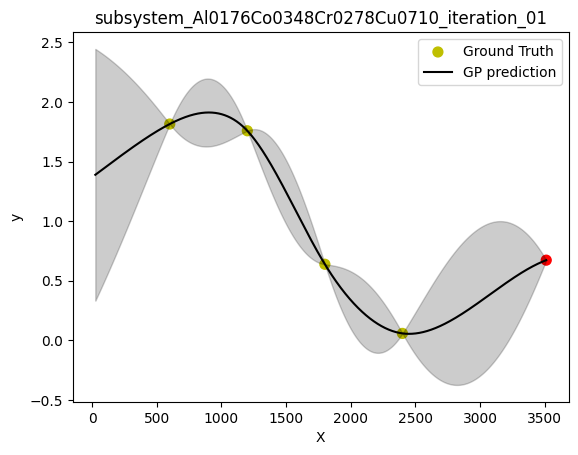

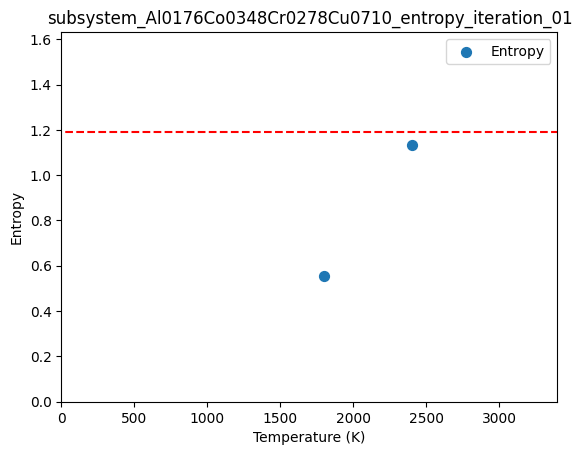

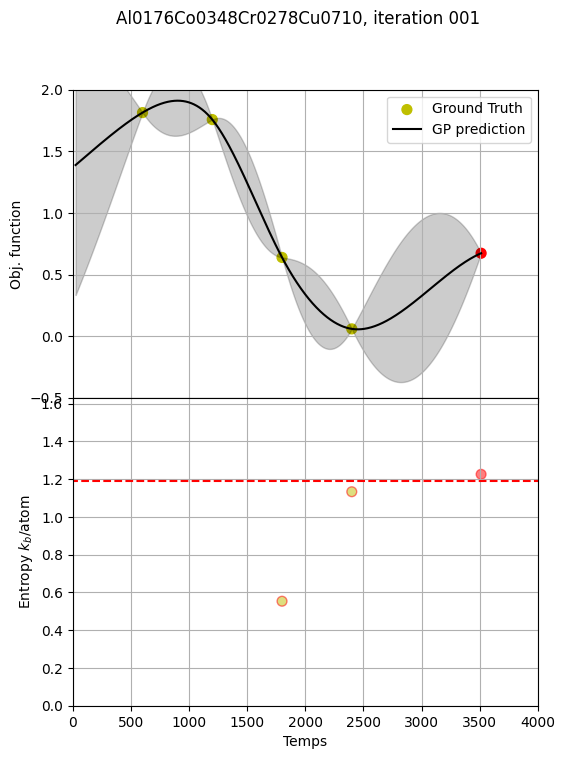

2025-02-01 10:31:18 - subsystem Al0176Co0348Cr0278Cu0710, iteration 2, x selected = [1.86564376] , in non-scaled x = [[2751.51188243]]

2025-02-01 10:37:52 - subsystem Al0176Co0348Cr0278Cu0710, iteration 2, in non-scaled y obtained = 0.001938591912134413 , 



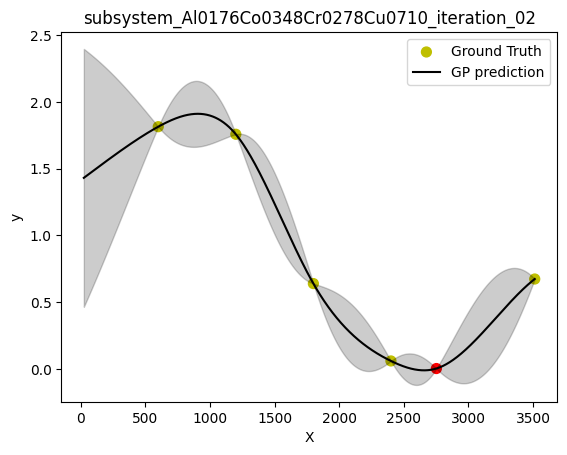

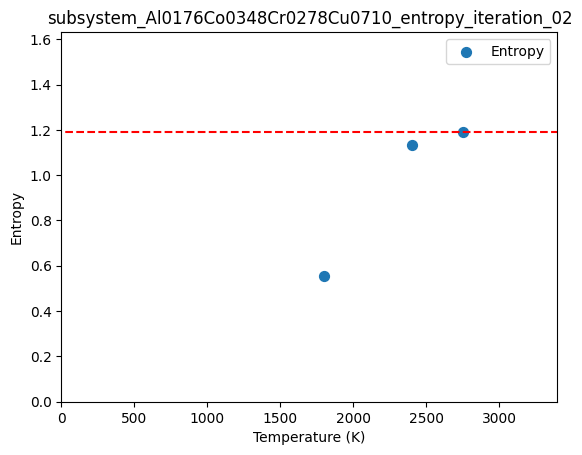

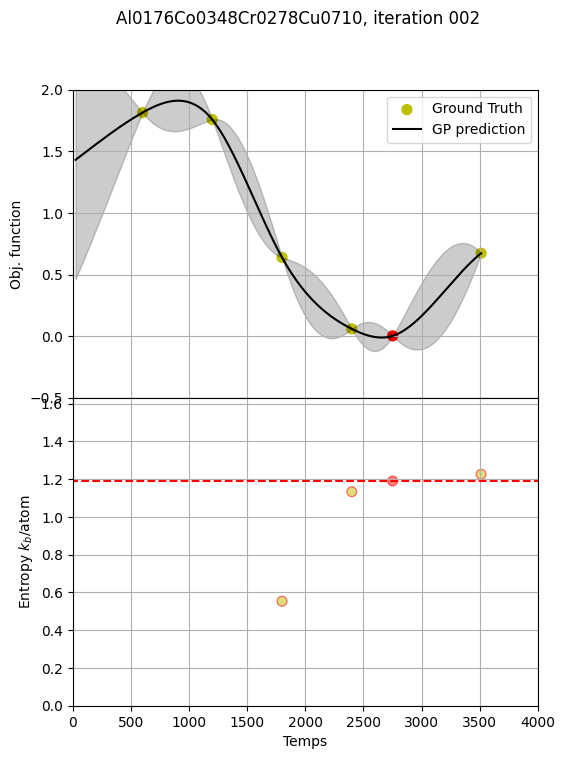

2025-02-01 10:37:55 - subsystem Al0176Co0348Cr0278Cu0710, iteration 3, x selected = [1.657505] , in non-scaled x = [[2611.88815815]]

2025-02-01 10:38:22 - subsystem Al0244Co0563Cr0492Cu1005, iteration 1, in non-scaled y obtained = 0.680006980318808 , 



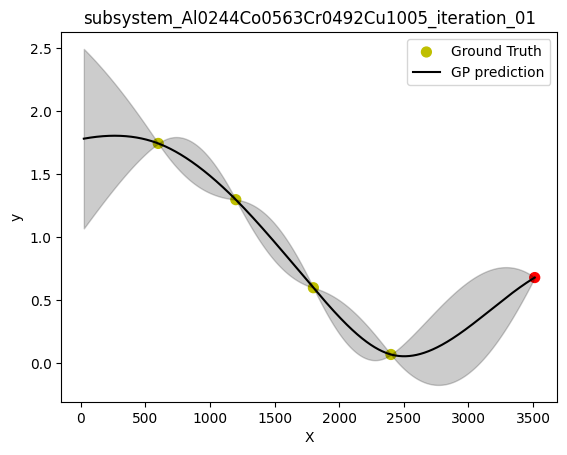

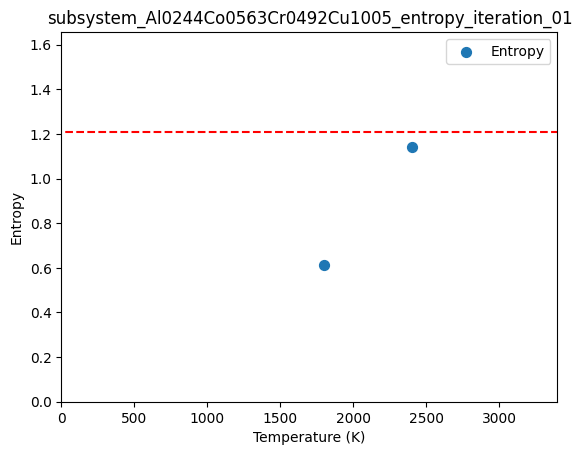

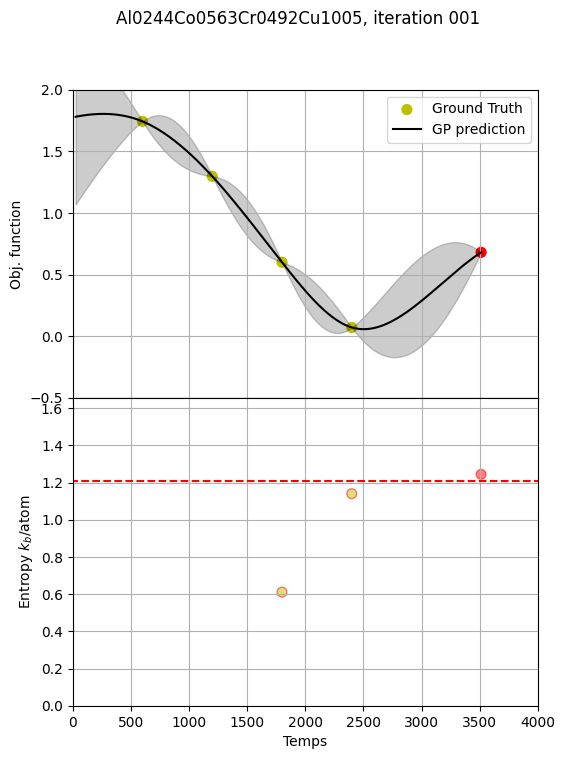

2025-02-01 10:38:25 - subsystem Al0244Co0563Cr0492Cu1005, iteration 2, x selected = [1.81360907] , in non-scaled x = [[2716.60595136]]

2025-02-01 10:44:38 - subsystem Al0176Co0348Cr0278Cu0710, iteration 3, in non-scaled y obtained = 0.02478624223450332 , 



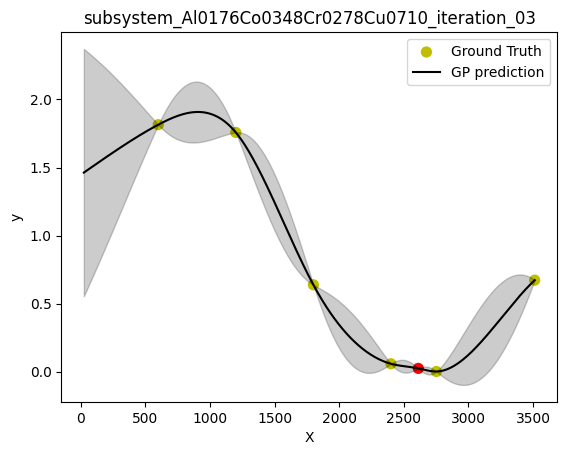

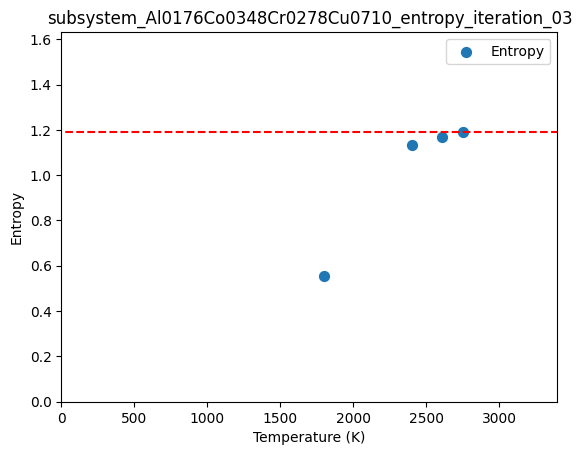

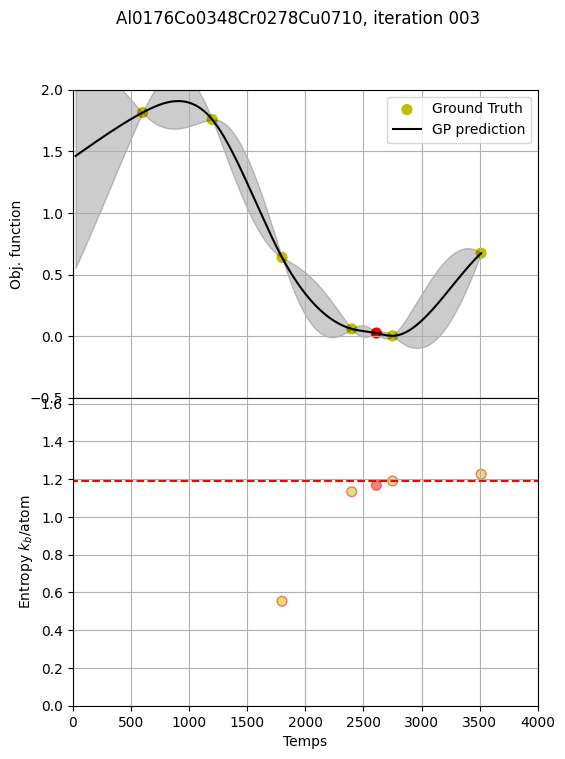

2025-02-01 10:44:44 - subsystem Al0176Co0348Cr0278Cu0710, iteration 4, x selected = [2.11194129] , in non-scaled x = [[2916.73328949]]

2025-02-01 10:46:22 - subsystem Al0244Co0563Cr0492Cu1005, iteration 2, in non-scaled y obtained = 0.01049330985470931 , 



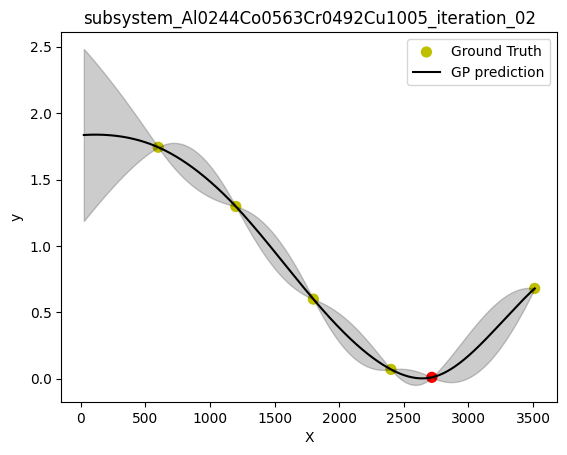

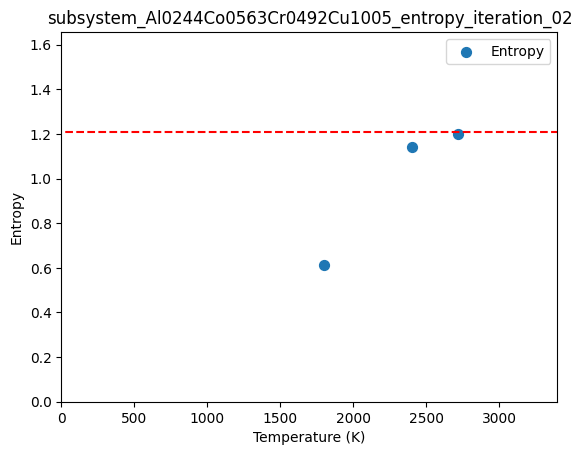

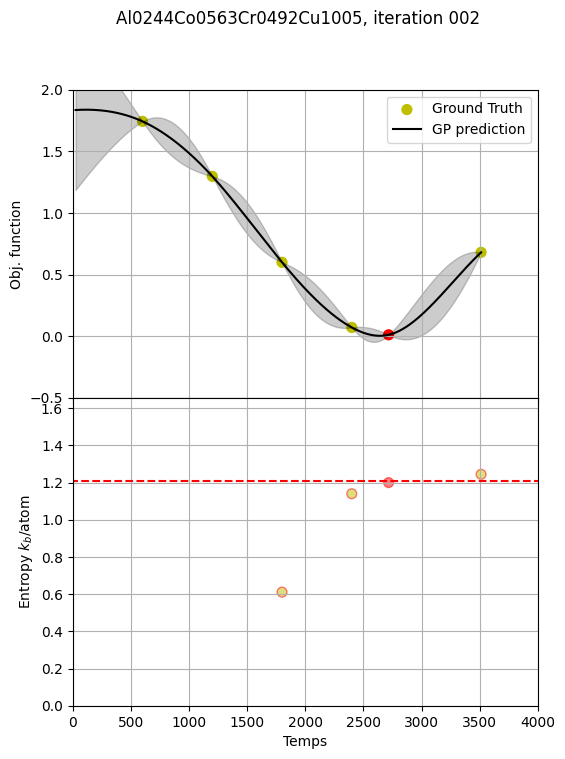

2025-02-01 10:46:25 - subsystem Al0244Co0563Cr0492Cu1005, iteration 3, x selected = [1.64016011] , in non-scaled x = [[2600.25284779]]

2025-02-01 10:51:10 - subsystem Al0176Co0348Cr0278Cu0710, iteration 4, in non-scaled y obtained = 0.23174218900084753 , 



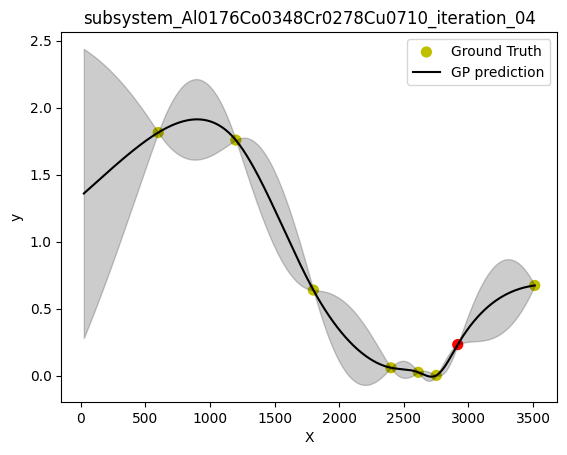

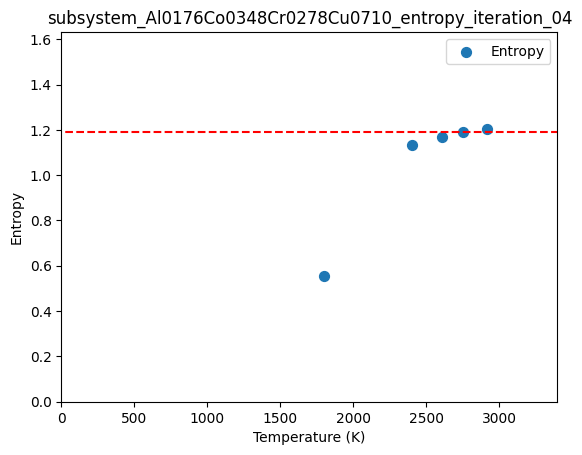

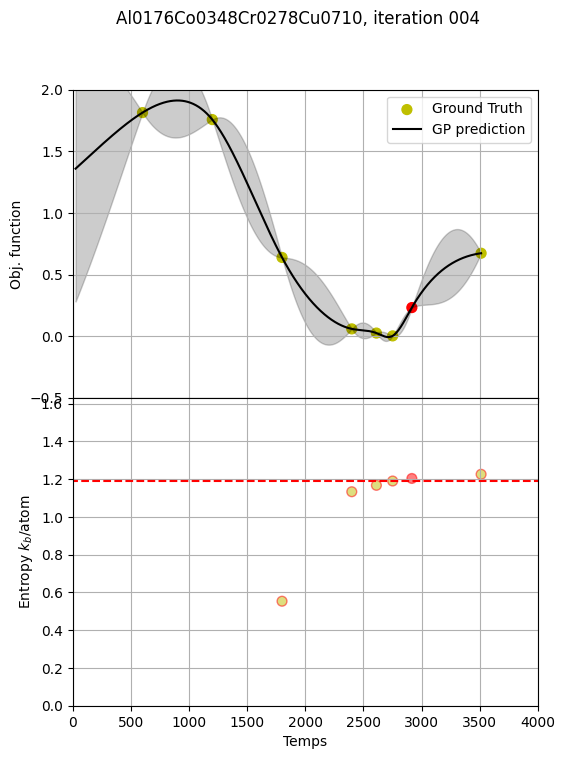

2025-02-01 10:51:13 - subsystem Al0176Co0348Cr0278Cu0710, iteration 5, x selected = [1.78932622] , in non-scaled x = [[2700.31651686]]

2025-02-01 10:54:19 - subsystem Al0244Co0563Cr0492Cu1005, iteration 3, in non-scaled y obtained = 0.034932045697246394 , 



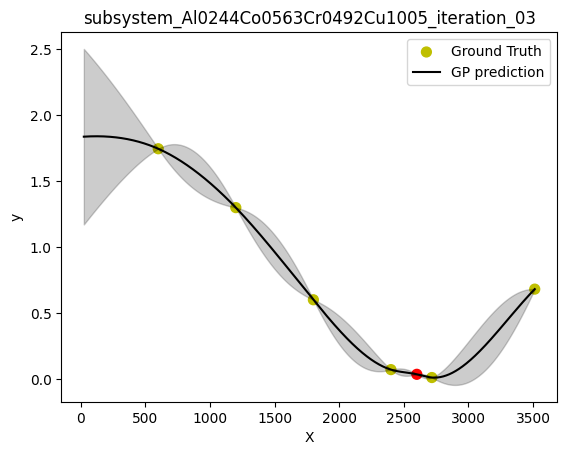

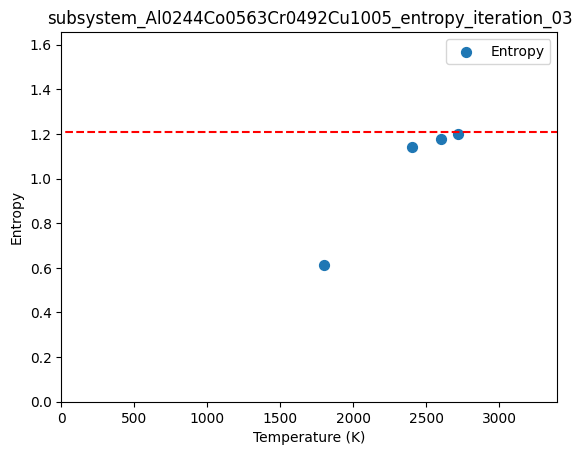

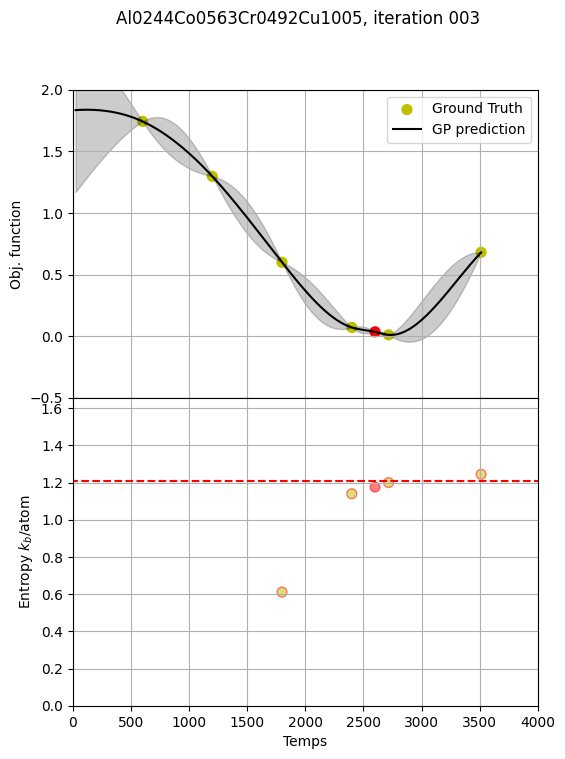

2025-02-01 10:54:22 - subsystem Al0244Co0563Cr0492Cu1005, iteration 4, x selected = [2.04949967] , in non-scaled x = [[2874.84617221]]

2025-02-01 10:57:57 - subsystem Al0176Co0348Cr0278Cu0710, iteration 5, in non-scaled y obtained = 0.0028969965975331746 , 



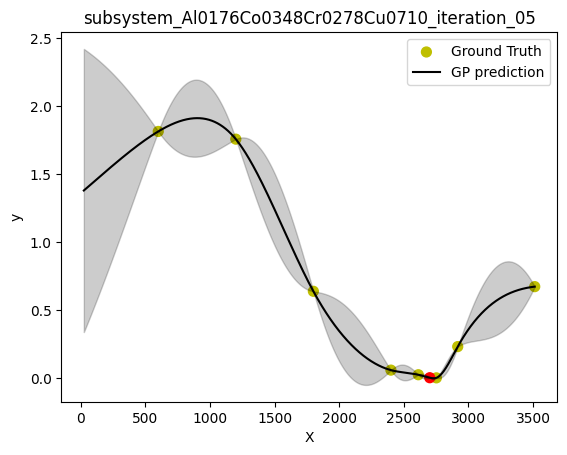

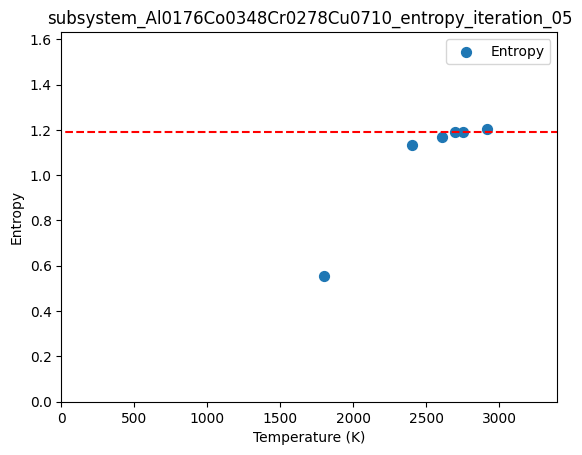

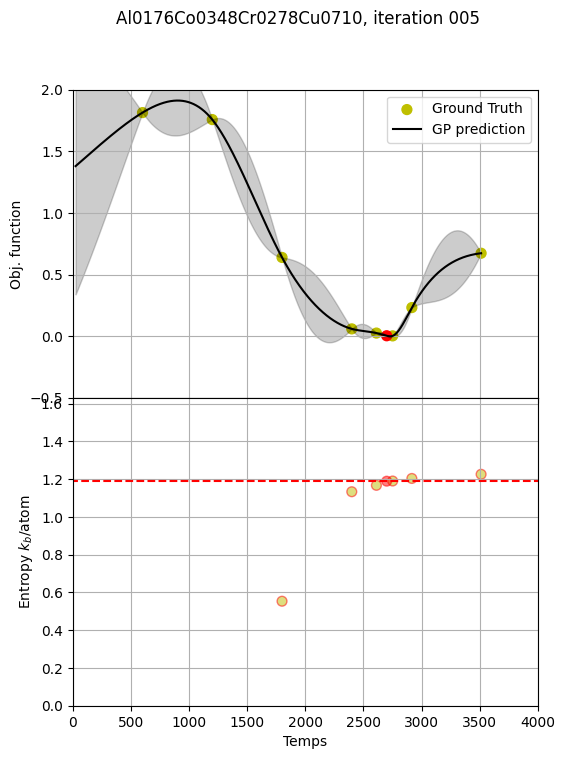

2025-02-01 10:58:00 - subsystem Al0176Co0348Cr0278Cu0710, iteration 6, x selected = [1.05043362] , in non-scaled x = [[2204.65229567]]

2025-02-01 11:02:34 - subsystem Al0244Co0563Cr0492Cu1005, iteration 4, in non-scaled y obtained = 0.11783438346469666 , 



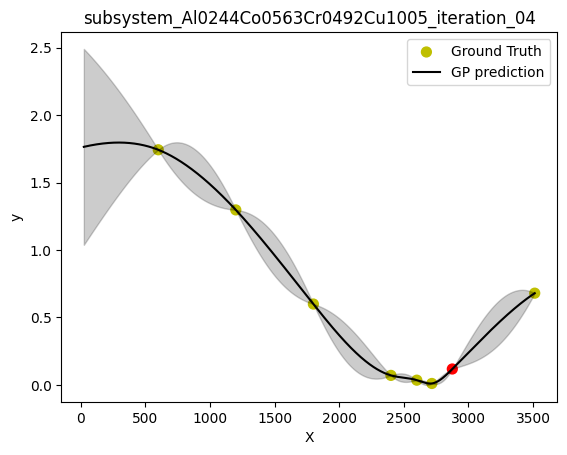

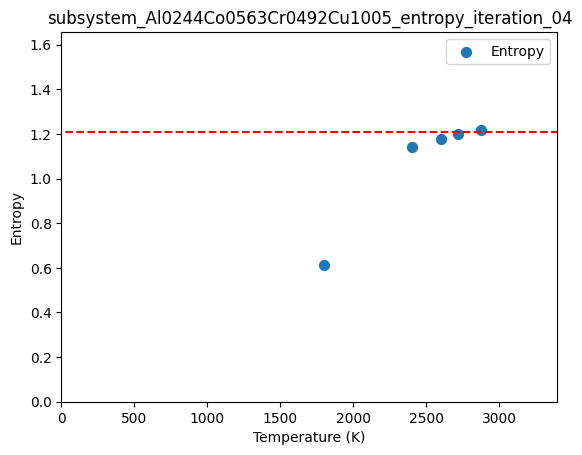

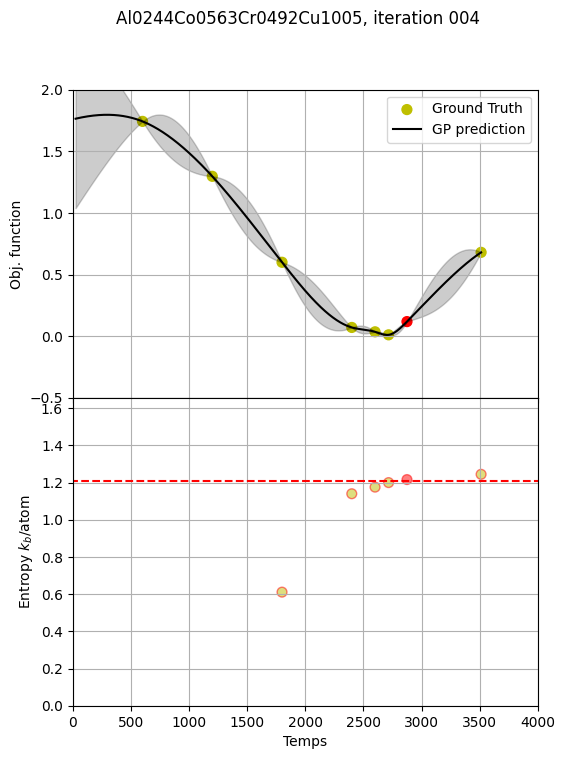

2025-02-01 11:02:38 - subsystem Al0244Co0563Cr0492Cu1005, iteration 5, x selected = [1.06777852] , in non-scaled x = [[2216.28760603]]

2025-02-01 11:04:32 - subsystem Al0176Co0348Cr0278Cu0710, iteration 6, in non-scaled y obtained = 0.18721817098426818 , 



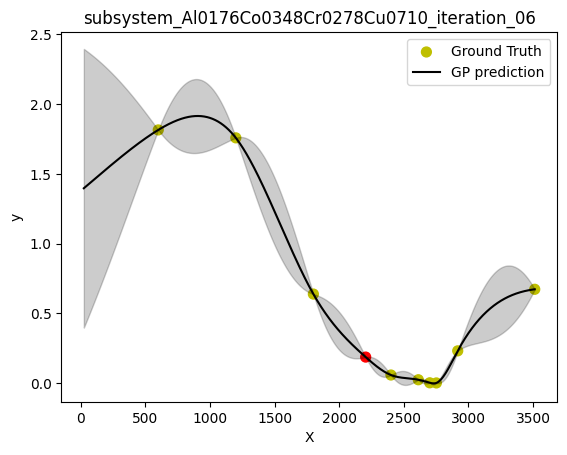

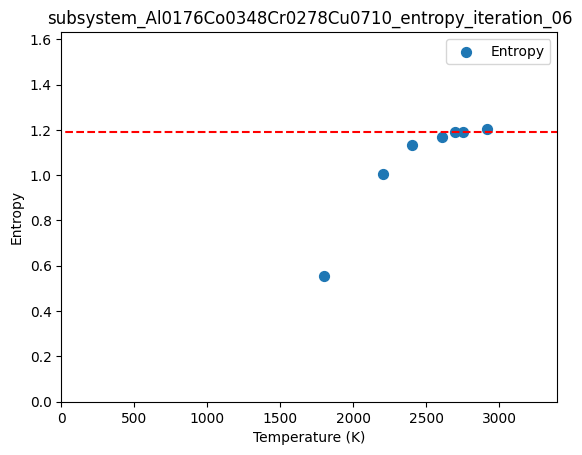

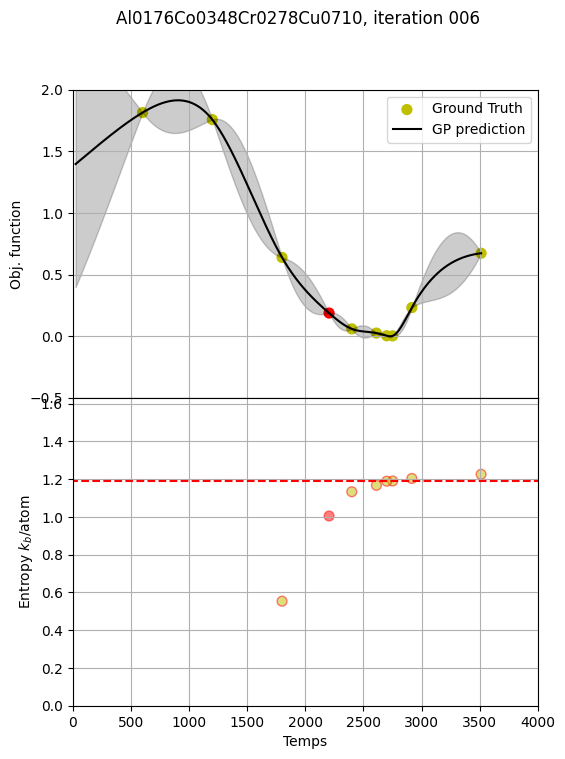

2025-02-01 11:04:36 - subsystem Al0176Co0348Cr0278Cu0710, iteration 7, x selected = [-2.2] , in non-scaled x = [[24.19513485]]

2025-02-01 11:10:33 - subsystem Al0176Co0348Cr0278Cu0710, iteration 7, in non-scaled y obtained = 1.6158728992369173 , 



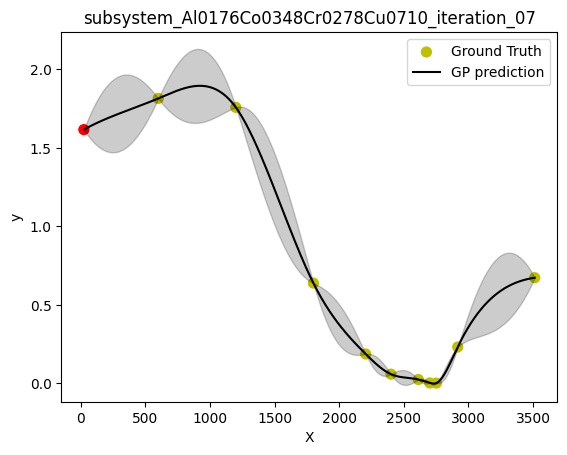

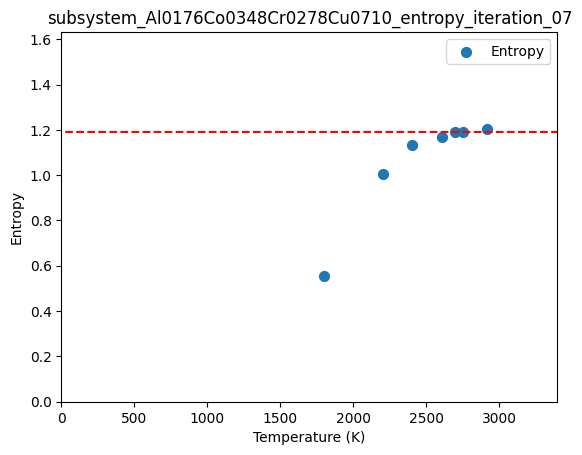

2025-02-01 11:10:34 - subsystem Al0244Co0563Cr0492Cu1005, iteration 5, in non-scaled y obtained = 0.1416060880546155 , 



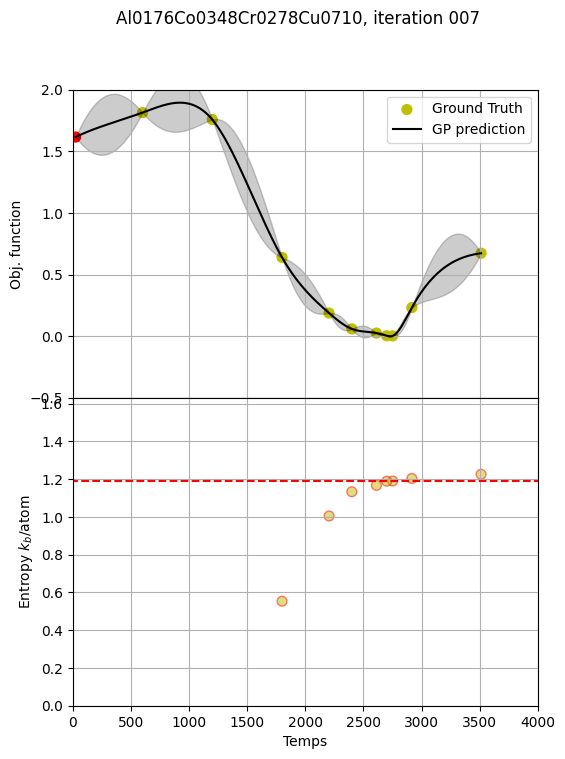

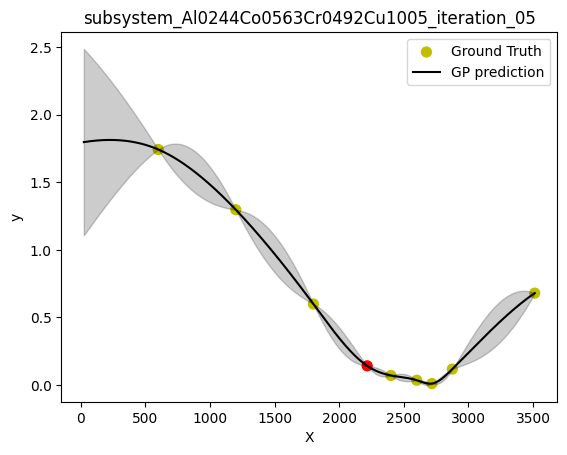

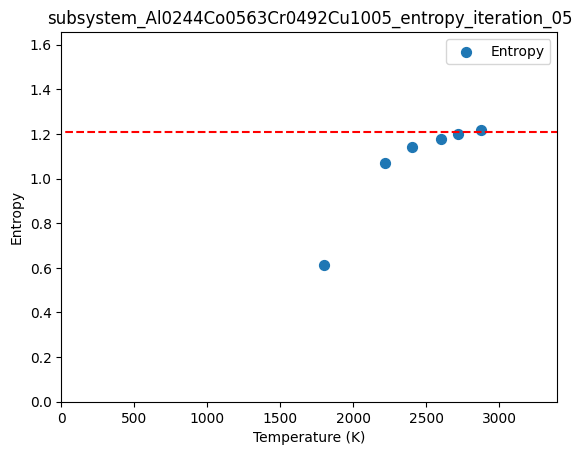

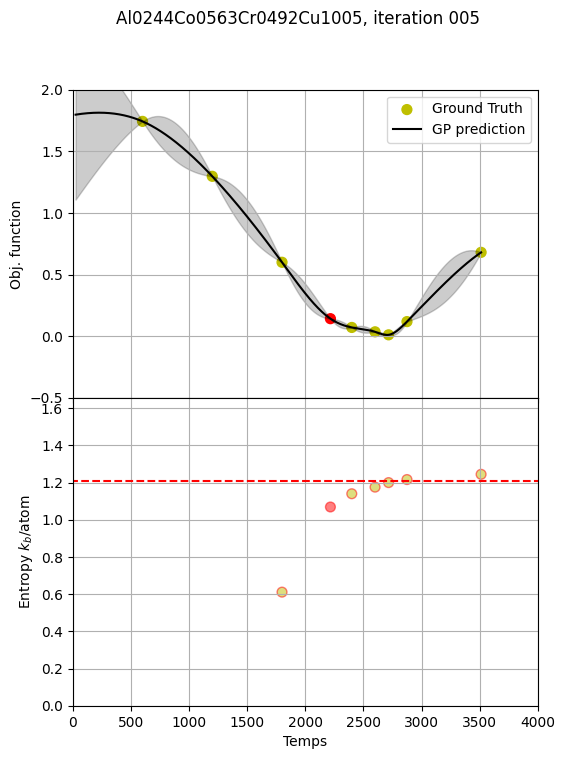

2025-02-01 11:10:37 - subsystem Al0176Co0348Cr0278Cu0710, iteration 8, x selected = [1.50486991] , in non-scaled x = [[2509.49742701]]

2025-02-01 11:10:38 - subsystem Al0244Co0563Cr0492Cu1005, iteration 6, x selected = [1.74769847] , in non-scaled x = [[2672.39177201]]

2025-02-01 11:17:24 - subsystem Al0176Co0348Cr0278Cu0710, iteration 8, in non-scaled y obtained = 0.03536569391944333 , 



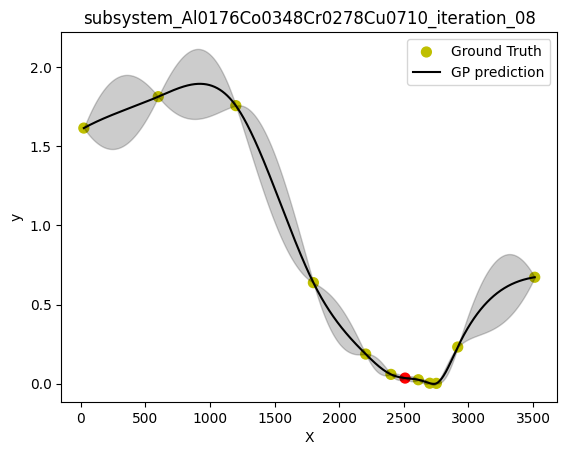

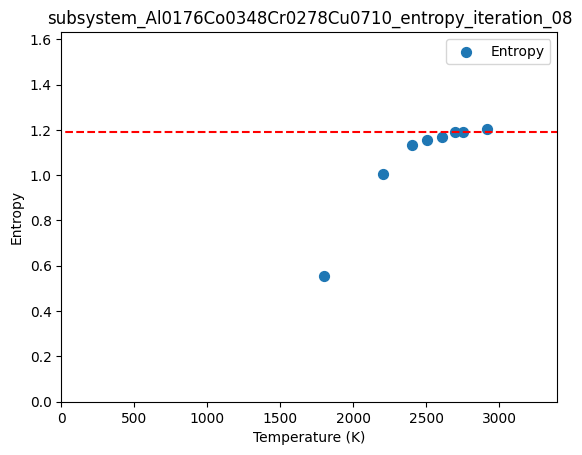

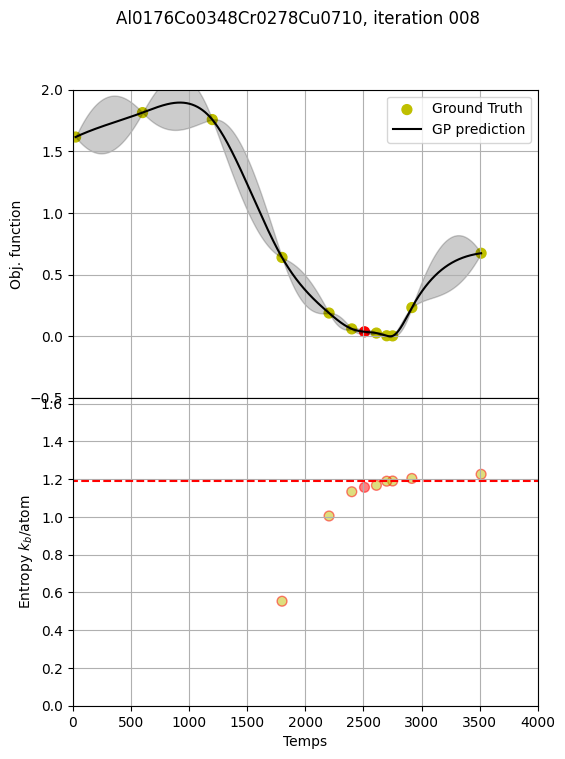

2025-02-01 11:17:27 - subsystem Al0176Co0348Cr0278Cu0710, iteration 9, x selected = [1.83095397] , in non-scaled x = [[2728.24126172]]

2025-02-01 11:18:52 - subsystem Al0244Co0563Cr0492Cu1005, iteration 6, in non-scaled y obtained = 0.017906358267715916 , 



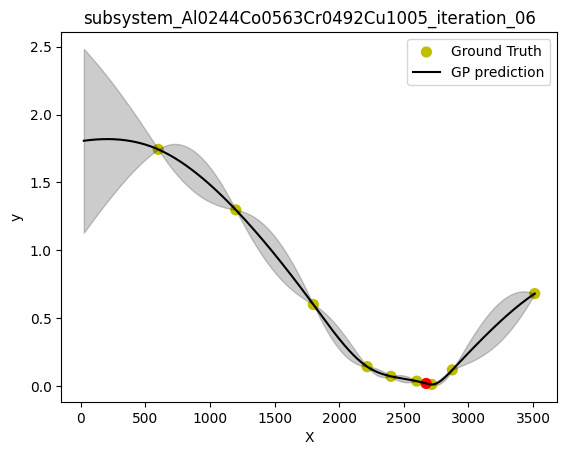

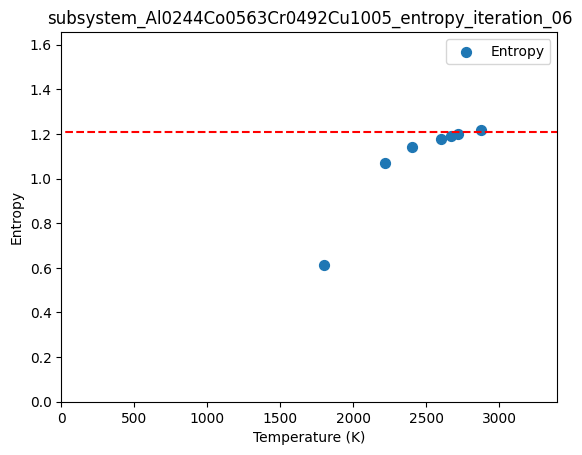

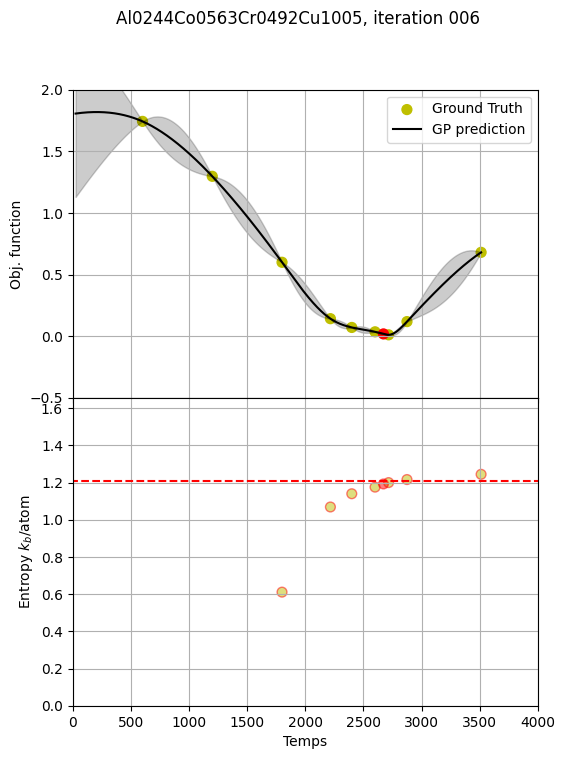

2025-02-01 11:18:57 - subsystem Al0244Co0563Cr0492Cu1005, iteration 7, x selected = [-2.2] , in non-scaled x = [[24.19513485]]

2025-02-01 11:24:14 - subsystem Al0176Co0348Cr0278Cu0710, iteration 9, in non-scaled y obtained = 0.01568654329918928 , 



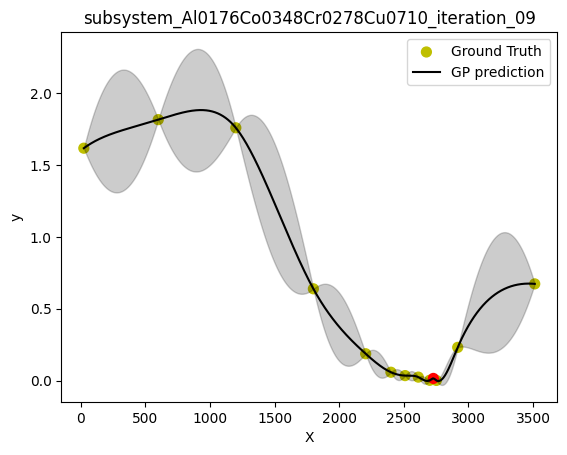

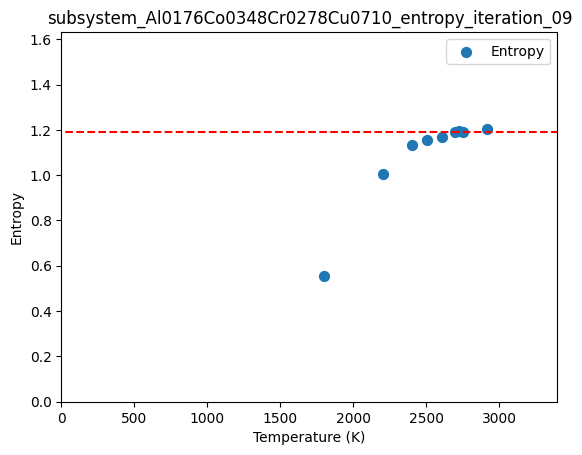

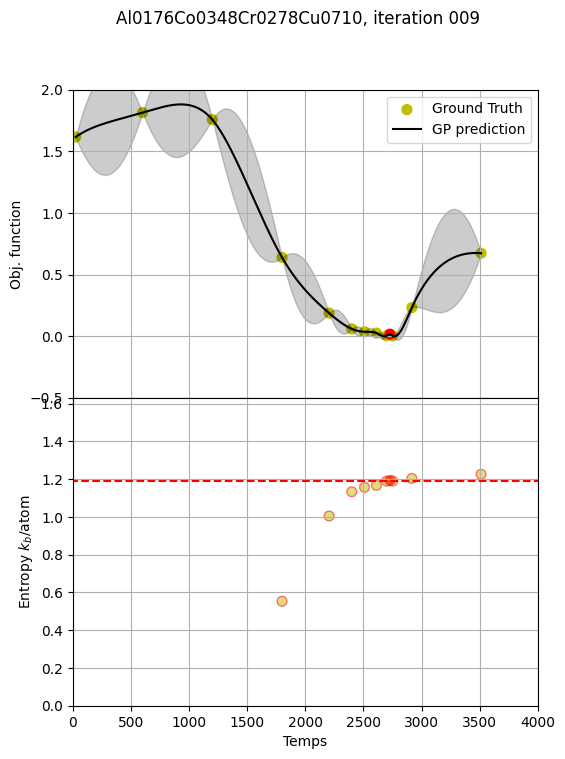

2025-02-01 11:24:18 - subsystem Al0176Co0348Cr0278Cu0710, iteration 10, x selected = [1.91767845] , in non-scaled x = [[2786.4178135]]

2025-02-01 11:26:17 - subsystem Al0244Co0563Cr0492Cu1005, iteration 7, in non-scaled y obtained = 1.7367127078064328 , 



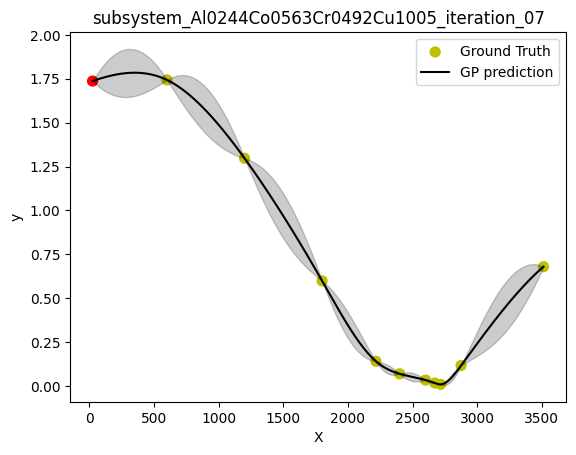

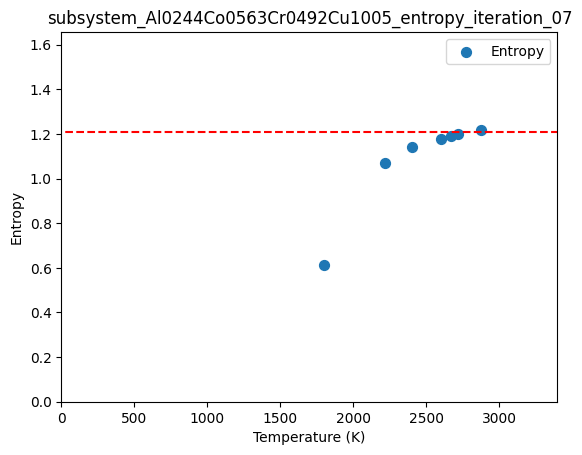

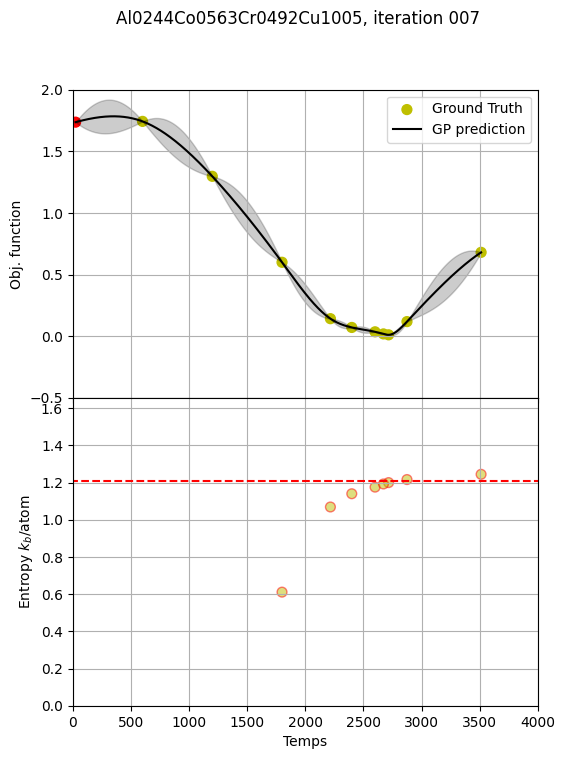

2025-02-01 11:26:21 - subsystem Al0244Co0563Cr0492Cu1005, iteration 8, x selected = [1.88992662] , in non-scaled x = [[2767.80131693]]

2025-02-01 11:30:36 - subsystem Al0176Co0348Cr0278Cu0710, iteration 10, in non-scaled y obtained = 0.03644425996899514 , 



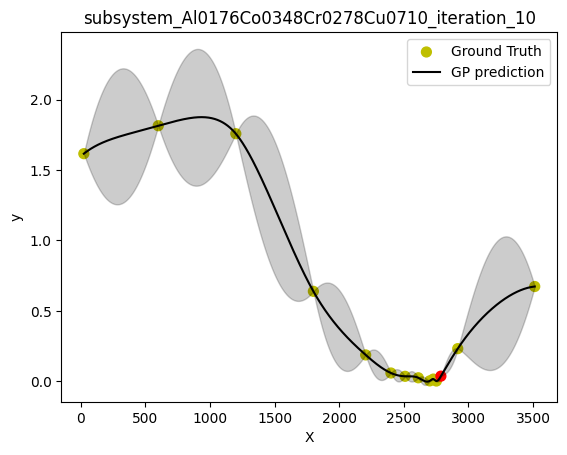

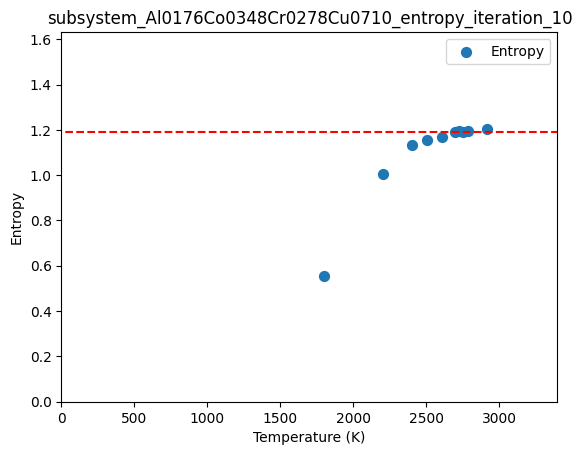

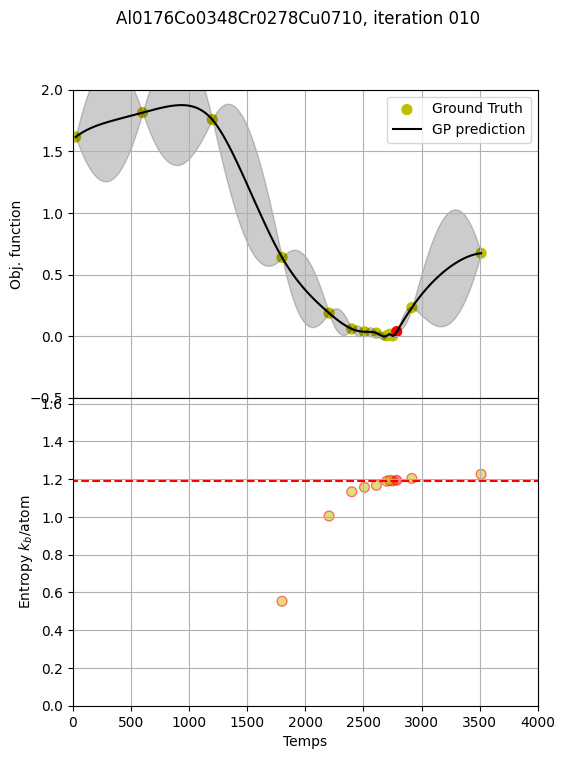

2025-02-01 11:33:40 - subsystem Al0244Co0563Cr0492Cu1005, iteration 8, in non-scaled y obtained = 0.006702434788419254 , 



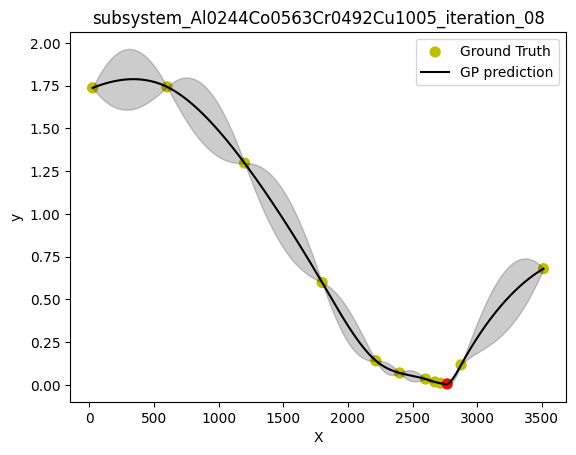

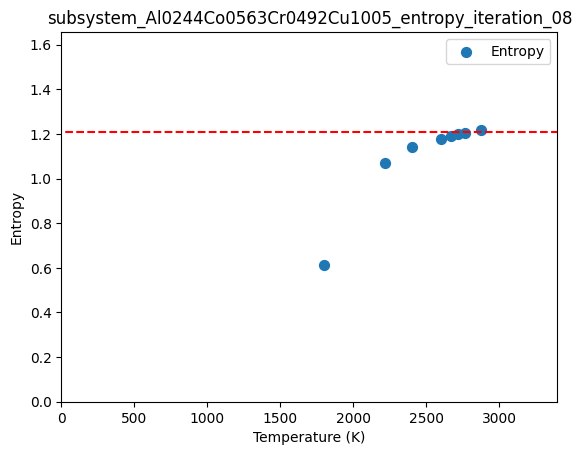

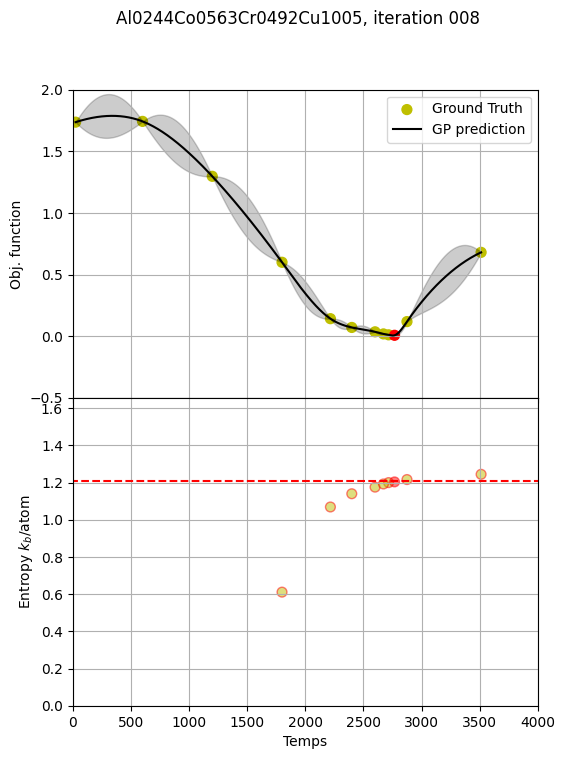

2025-02-01 11:33:46 - subsystem Al0244Co0563Cr0492Cu1005, iteration 9, x selected = [1.49793195] , in non-scaled x = [[2504.84330287]]

2025-02-01 11:40:59 - subsystem Al0244Co0563Cr0492Cu1005, iteration 9, in non-scaled y obtained = 0.03344844139500225 , 



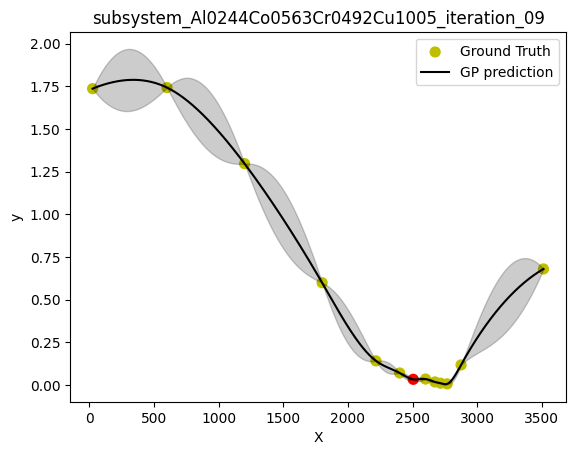

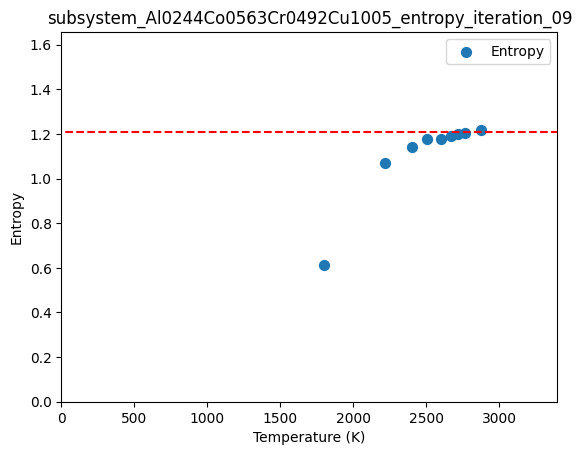

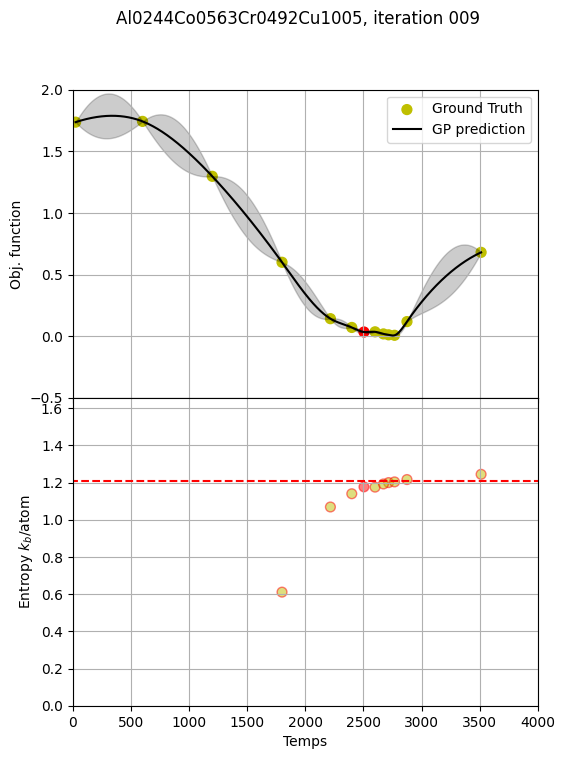

2025-02-01 11:41:04 - subsystem Al0244Co0563Cr0492Cu1005, iteration 10, x selected = [2.44496331] , in non-scaled x = [[3140.13124834]]

2025-02-01 11:48:22 - subsystem Al0244Co0563Cr0492Cu1005, iteration 10, in non-scaled y obtained = 0.37363574299739355 , 



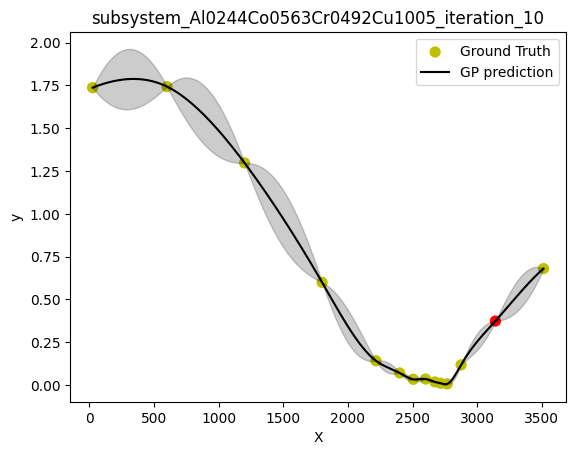

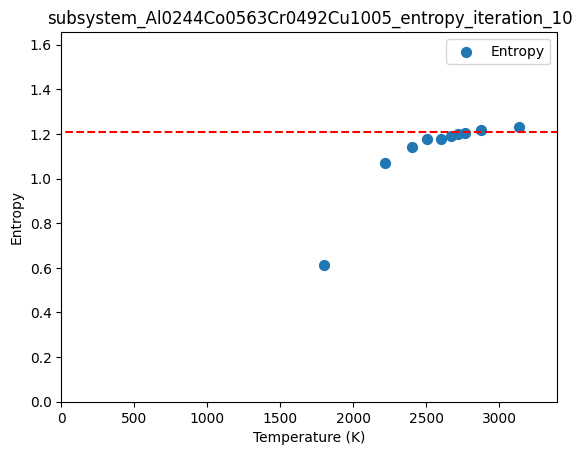

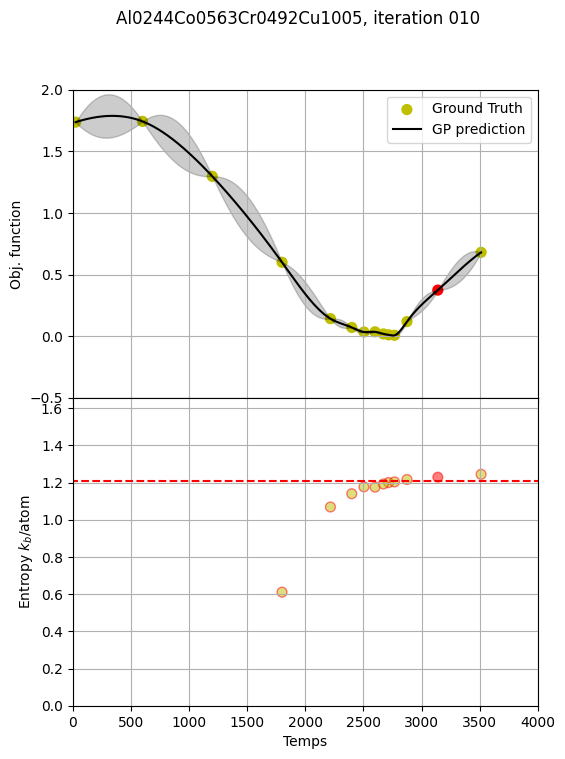

KeyError: 'iteration'

In [22]:
with multiprocessing.Pool(processes=2) as pool:
    results = pool.map(opt_mc, parallel_args)